In [1]:
import pandas as pd

file_path = '/kaggle/input/demand/reversed_finaldatacsv.xlsx'

df = pd.read_excel(file_path)
df.head()

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal
0,01-01-2016 08:00:00,4140.0,4140,3734,113,0
1,01-01-2016 09:00:00,3941.0,3941,3551,113,0
2,01-01-2016 10:00:00,3724.0,3724,3286,133,0
3,01-01-2016 11:00:00,3603.0,3603,3168,130,0
4,01-01-2016 12:00:00,3590.0,3590,3145,140,0


In [2]:
df['Datetime_formatted'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M:%S')

In [3]:
df

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal,Datetime_formatted
0,01-01-2016 08:00:00,4140.0,4140,3734,113,0,2016-01-01 08:00:00
1,01-01-2016 09:00:00,3941.0,3941,3551,113,0,2016-01-01 09:00:00
2,01-01-2016 10:00:00,3724.0,3724,3286,133,0,2016-01-01 10:00:00
3,01-01-2016 11:00:00,3603.0,3603,3168,130,0,2016-01-01 11:00:00
4,01-01-2016 12:00:00,3590.0,3590,3145,140,0,2016-01-01 12:00:00
...,...,...,...,...,...,...,...
70464,15-01-2024 08:00:00,8619.0,8619,4331,866,2434,2024-01-15 08:00:00
70465,15-01-2024 09:00:00,9018.0,9018,4224,1202,2572,2024-01-15 09:00:00
70466,15-01-2024 10:00:00,9162.0,9162,4223,1300,2573,2024-01-15 10:00:00
70467,15-01-2024 11:00:00,9211.0,9211,4101,1427,2567,2024-01-15 11:00:00


In [4]:
daily_counts = df.groupby(df['Datetime_formatted'].dt.date).size()
daily_counts 

Datetime_formatted
2016-01-01    16
2016-01-02    24
2016-01-03    24
2016-01-04    24
2016-01-05    24
              ..
2024-01-11    24
2024-01-12    24
2024-01-13    24
2024-01-14    24
2024-01-15    13
Length: 2937, dtype: int64

In [5]:
num_days_with_24_entries = (daily_counts == 24).sum()
num_days_with_24_entries

2935

In [6]:
dates_to_keep = daily_counts[daily_counts == 24].index
df_filtered = df[df['Datetime_formatted'].dt.date.isin(dates_to_keep)]
df_filtered

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal,Datetime_formatted
16,02-01-2016 00:00:00,3737.0,3737,3269,123,0,2016-01-02 00:00:00
17,02-01-2016 01:00:00,4023.0,4023,3312,198,0,2016-01-02 01:00:00
18,02-01-2016 02:00:00,5606.0,5606,3786,1313,0,2016-01-02 02:00:00
19,02-01-2016 03:00:00,5847.0,5847,4235,1099,0,2016-01-02 03:00:00
20,02-01-2016 04:00:00,5880.0,5880,4287,1080,0,2016-01-02 04:00:00
...,...,...,...,...,...,...,...
70451,14-01-2024 19:00:00,10209.0,10209,4240,2459,2464,2024-01-14 19:00:00
70452,14-01-2024 20:00:00,10289.0,10289,4369,2391,2513,2024-01-14 20:00:00
70453,14-01-2024 21:00:00,10004.0,10004,4421,2099,2406,2024-01-14 21:00:00
70454,14-01-2024 22:00:00,9560.0,9560,4237,1864,2381,2024-01-14 22:00:00


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

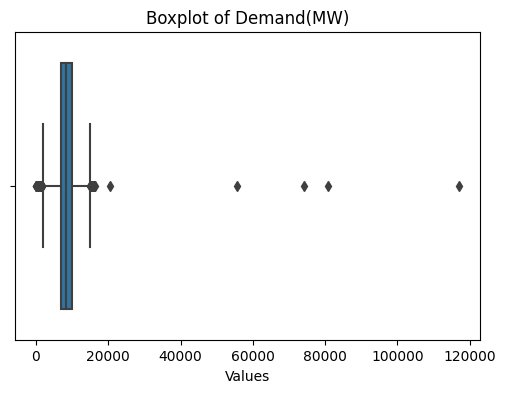

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filtered['Demand(MW)'])
plt.title('Boxplot of Demand(MW)')
plt.xlabel('Values')

plt.show()

In [9]:
df_filtered['Demand(MW)'] = df_filtered['Demand(MW)'].clip(upper=18000)

<ipython-input-9-1d42b4394300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Demand(MW)'] = df_filtered['Demand(MW)'].clip(upper=18000)


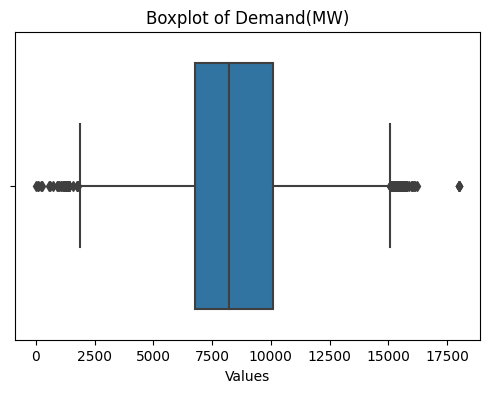

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filtered['Demand(MW)'])
plt.title('Boxplot of Demand(MW)')
plt.xlabel('Values')

plt.show()

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [12]:
demand_data = df_filtered['Demand(MW)'].values

In [13]:
demand_data

array([ 3737,  4023,  5606, ..., 10004,  9560,  8793])

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(demand_data.reshape(-1, 1))
data_scaled

array([[0.20734689],
       [0.22324108],
       [0.31121485],
       ...,
       [0.55562965],
       [0.53095476],
       [0.48832944]])

In [15]:
train_samples = 2800 * 24
val_samples = 2 * 24
test2_samples = 2 * 24
test7_samples = 7 * 24
look_back = 24

In [16]:
def create_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

In [17]:
train_data = data_scaled[:train_samples]  
val_data = data_scaled[train_samples:train_samples + val_samples]  
test2_data = data_scaled[train_samples + val_samples:train_samples + val_samples + test2_samples] 
test7_data = data_scaled[train_samples + val_samples + test2_samples:train_samples + val_samples + test2_samples + test7_samples]

In [18]:
X_train, y_train = create_dataset(train_data, look_back)
X_test2, y_test2 = create_dataset(test2_data, look_back)
X_test7, y_test7 = create_dataset(test7_data, look_back)
X_val, y_val = create_dataset(val_data, look_back)

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)
X_test7 = X_test7.reshape(X_test7.shape[0], X_test7.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

In [ ]:
class GWO:
    def __init__(self, obj_func, dim, search_space, wolves=5, max_iter=10):
        self.obj_func = obj_func  # Objective function (Bi-GRU performance)
        self.dim = dim  # Number of hyperparameters
        self.search_space = search_space  # Search space for each parameter
        self.wolves = wolves  # Population size
        self.max_iter = max_iter  # Max iterations
        self.initialize_wolves()
    
    def initialize_wolves(self):
        self.positions = np.array([np.random.uniform(low, high, self.wolves) for low, high in self.search_space]).T
        self.alpha, self.beta, self.delta = None, None, None
    
    def update_wolves(self):
        sorted_wolves = sorted(self.positions, key=self.obj_func)
        self.alpha, self.beta, self.delta = sorted_wolves[:3]
    
    def optimize(self):
        for t in range(self.max_iter):
            self.update_wolves()
            a = 2 - t * (2 / self.max_iter)
            for i in range(self.wolves):
                A1, A2, A3 = [2 * a * np.random.rand(self.dim) - a for _ in range(3)]
                C1, C2, C3 = [2 * np.random.rand(self.dim) for _ in range(3)]
                D_alpha = abs(C1 * self.alpha - self.positions[i])
                D_beta = abs(C2 * self.beta - self.positions[i])
                D_delta = abs(C3 * self.delta - self.positions[i])
                X1 = self.alpha - A1 * D_alpha
                X2 = self.beta - A2 * D_beta
                X3 = self.delta - A3 * D_delta
                
                # Ensure the new position stays within the search space
                self.positions[i] = np.clip((X1 + X2 + X3) / 3, 
                                            [low for low, _ in self.search_space], 
                                            [high for _, high in self.search_space])
        
        self.update_wolves()
        return self.alpha


In [ ]:
def build_model(units, dropout_rate):
    model = Sequential([
        Bidirectional(GRU(units*3, return_sequences=True, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01))),
        Dropout(dropout_rate),
        Bidirectional(LSTM(units, return_sequences=False)),
        Dropout(dropout_rate),
        Dense(1)  
    ])
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), loss='mse')
    return model

In [ ]:
def objective_function(params):
    units = int(np.clip(params[0], 8, 48))  # Restrict range for GRU units
    dropout_rate = np.clip(params[1], 0.2, 0.4)  # Restrict dropout range
    
    model = build_model(units, dropout_rate)
    
    # Use Early Stopping to reduce computation time
    early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
    
    model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=0, validation_split=0.1, callbacks=[early_stop])
    
    mse = model.evaluate(X_test2, y_test2, verbose=0)  # Return single value MSE
    return mse

In [ ]:
search_space = [(8, 48), (0.2, 0.4)]

In [ ]:
gwo = GWO(objective_function, dim=2, search_space=search_space, wolves=3, max_iter=5)
best_params = gwo.optimize()   

In [ ]:
best_units, best_dropout = int(best_params[0]), best_params[1]
print(f"Best Unit: {best_units}")     
print(f"Best Dropout: {best_dropout}") 

In [ ]:
model = build_model(best_units, best_dropout)

In [21]:
model = Sequential([
        Bidirectional(GRU(36*3, return_sequences=True, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01))),
        Dropout(0.214),
        Bidirectional(LSTM(36, return_sequences=False)),
        Dropout(0.214),
        Dense(1)  
    ])
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), loss='mse')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights
)

In [23]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Reduce learning rate by a factor of 0.5
    patience=5,          # Wait 5 epochs before reducing
    min_lr=1e-6          # Minimum learning rate
)

In [24]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Increase epochs since early stopping will handle stopping
    batch_size=128,
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]  # Add callbacks
)

Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0384 - val_loss: 0.0064 - learning_rate: 0.0010
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0043 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0029 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0025 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0021 - val_loss: 9.7155e-04 - learning_rate: 0.0010
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0018 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0017 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0016 - val_loss: 8.9616e-04 - learning_rate: 0.0010
Epoch 9/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0015 - val_loss: 0.0014 - learn

In [25]:
loss_history = pd.DataFrame({
    'epoch': range(1, len(history.history['loss']) + 1),
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']  
})

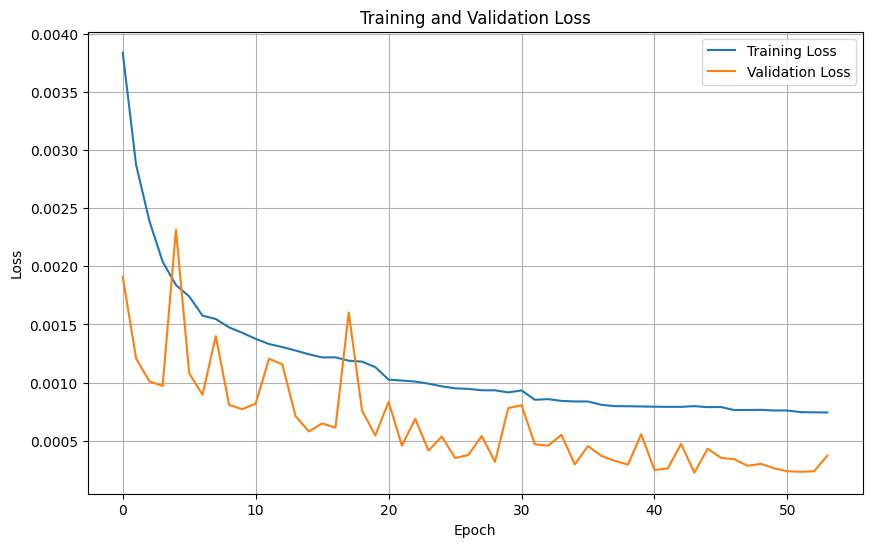

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'][1:], label='Training Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png')  # Save the plot as an image
plt.show()

In [27]:
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Model

feature_extractor = Sequential(model.layers[:-1])

In [28]:
X_train_features = feature_extractor.predict(X_train)

2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [29]:
d = {}

In [30]:
for i in range(1000, 1200):
    xgb_model = xgb.XGBRegressor(n_estimators=i, learning_rate=0.1)
    xgb_model.fit(X_train_features, y_train)
    X_test_features = feature_extractor.predict(X_test2)
    y_pred2 = xgb_model.predict(X_test_features)
    mape = mean_absolute_percentage_error(y_test2, y_pred2)
    d[i] = mape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

In [31]:
mn = 1
p = 0
for i in range(1000, 1200):
    if d[i]< mn:
        mn = d[i]
        p = i

print(f"Sample: {p}, MAPE: {mn}")

Sample: 1054, MAPE: 0.01661538539018896


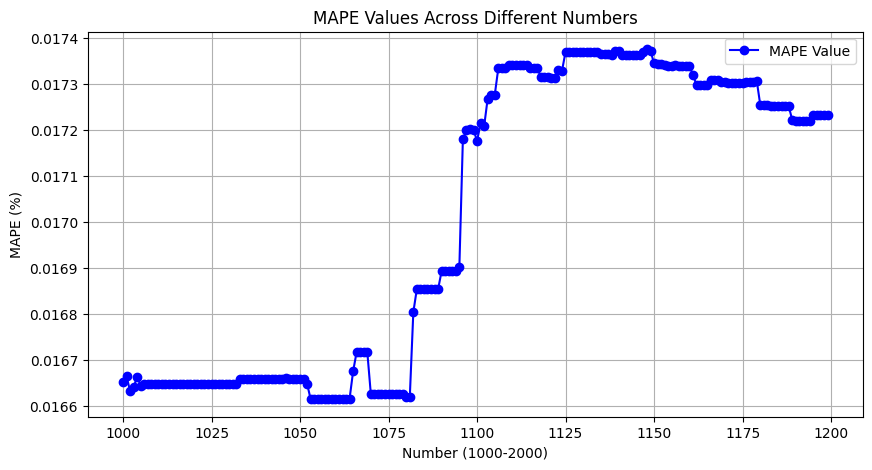

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(d.keys(), d.values(), marker='o', linestyle='-', color='b', label="MAPE Value")

# Labels and title
plt.xlabel("Number (1000-2000)")
plt.ylabel("MAPE (%)")
plt.title("MAPE Values Across Different Numbers")
plt.legend()
plt.grid(True)

# Show plot
plt.show() 

In [33]:
# Train XGBoost on extracted features
xgb_model = xgb.XGBRegressor(n_estimators=p, learning_rate=0.1)
xgb_model.fit(X_train_features, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1054, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
X_test_features = feature_extractor.predict(X_test2)
y_pred2 = xgb_model.predict(X_test_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [35]:
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
mse = mean_squared_error(y_test2, y_pred2) 
mape = mean_absolute_percentage_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

In [36]:
print(f" RMSE:{rmse},\n MSE:{mse},\n MAPE:{mape*100}%,\n R-Squared:{r2}")

 RMSE:0.027381653059052564,
 MSE:0.0007497549242463226,
 MAPE:1.6615385390188961%,
 R-Squared:0.4620099379754192


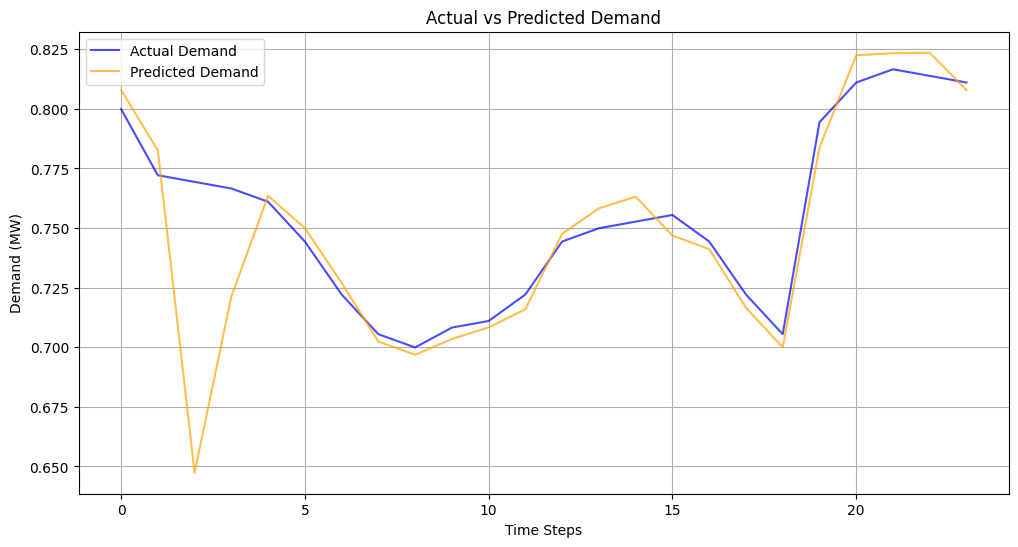

In [40]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(y_test2.flatten(), label='Actual Demand', color='blue', alpha=0.7)
plt.plot(y_pred2.flatten(), label='Predicted Demand', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
X_test_features = feature_extractor.predict(X_test7)
y_pred7 = xgb_model.predict(X_test_features)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [43]:
rmse = np.sqrt(mean_squared_error(y_test7, y_pred7))
mse = mean_squared_error(y_test7, y_pred7) 
mape = mean_absolute_percentage_error(y_test7, y_pred7)
r2 = r2_score(y_test7, y_pred7)

In [44]:
print(f" RMSE:{rmse},\n MSE:{mse},\n MAPE:{mape*100}%,\n R-Squared:{r2}")

 RMSE:0.022684351799229705,
 MSE:0.0005145798165512159,
 MAPE:1.8573641660830336%,
 R-Squared:0.8940119945267953


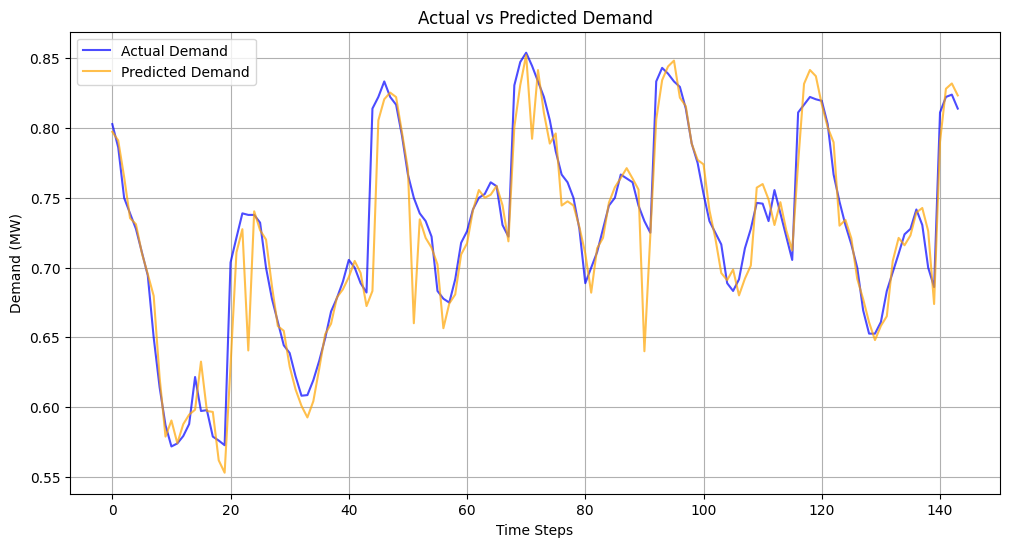

In [45]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(y_test7.flatten(), label='Actual Demand', color='blue', alpha=0.7)
plt.plot(y_pred7.flatten(), label='Predicted Demand', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()